In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

这段代码使用 Python 的 Seaborn 和 Matplotlib 库创建了一个包含多种元素的双变量（二维）数据可视化图表。

<Axes: >

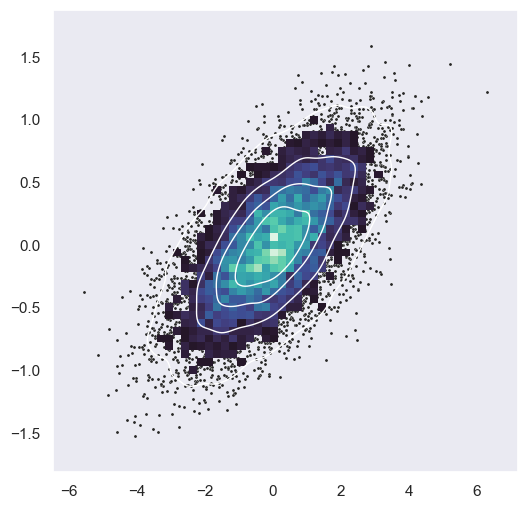

In [3]:
sns.set_theme(style="dark")

# 从二元高斯分布（二维正态分布）生成数据
# Simulate data from a bivariate Gaussian
n = 10000       # 样本量
mean = [0, 0]   # 两个维度的均值均为 0
cov = [(2, .4), (.4, .2)]       # 协方差矩阵，定义两个变量的方差和相关性：第一个变量的方差为 2，第二个为 0.2。 协方差为 0.4，表示两变量有正相关性。
rng = np.random.RandomState(0)  # 固定随机种子（RandomState(0)），确保每次运行生成相同数据。
x, y = rng.multivariate_normal(mean, cov, n).T  # 转置数据，使 x 和 y 分离为两个一维数组。

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")                 # 绘制散点图
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")    # 绘制二维直方图
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)    # 绘制密度等高线

### **最终效果**
图表结合了三种元素：
1. **散点图**：显示原始数据点的分布。
2. **二维直方图**：用颜色深浅表示局部密度。
3. **密度等高线**：用白色轮廓线标记密度层级。

这种多元素叠加的方式可以清晰展示数据的分布、密度和相关性。

### **补充说明**
- 如果运行代码，你会看到一张深色背景的图：
  - 散点图（灰色点）展示数据原始分布。
  - 蓝色渐变区域（直方图）高亮高密度区。
  - 白色等高线进一步强调密度变化。
- 适用于探索两个连续变量之间的关系（如身高 vs 体重、温度 vs 湿度等）。

,position,step,walk
33,0,3,6
21,-1,1,4
37,0,2,7
46,1,1,9
60,0,0,12
4,0,4,0
15,0,0,3
17,0,2,3
98,1,3,19
24,-1,4,4


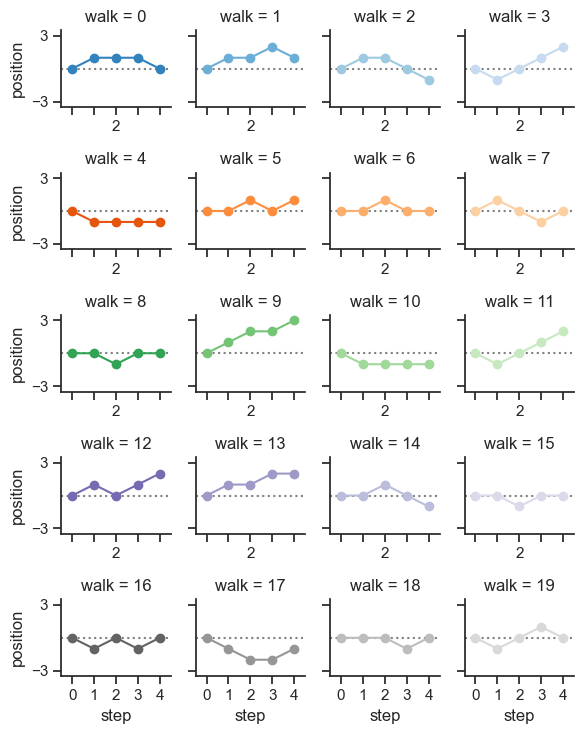

In [7]:
# 使用简洁的白色背景 + 坐标轴刻度线（无网格线）
# 默认会移除上方和右侧的边框（despine=True）
# 适合科学图表，避免视觉干扰
sns.set_theme(style="ticks")

# 生成随机游走数据
# Create a dataset with many short random walks
rs = np.random.RandomState(4)
# 生成 20 条随机游走路径，每条路径 5 步
# 每步的取值为 -1（左）、0（不动）、1（右）
# 对每条路径计算累积和（模拟随机游走的轨迹）
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
# 将所有路径的起点归零（标准化）
# np.newaxis：增加一个维度，将形状从 (20,) 变为 (20, 1)。为了广播（Broadcasting）规则：pos 是 (20, 5)，而起点需要是 (20, 1) 才能正确相减。
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)        # 重复 [0,1,2,3,4] 20 次（每条路径的步数编号）
walk = np.repeat(range(20), 5)      # 重复 [0,1,...,19] 5 次（路径ID）

# 列：position（位置）、step（步数）、walk（路径ID）
# 行：共 100 行（20 条路径 × 5 步）
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])
display(df.sample(10))

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle=":")    # 在每个子图中添加一条水平参考线（y=0）

# Draw a line plot to show the trajectory of each random walk
# 绘制随机游走轨迹
#     "step" 为 x 轴（步数）
#     "position" 为 y 轴（位置）
#     marker="o"：用圆圈标记每一步的位置
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
# 调整坐标轴
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
# 自动调整子图间距, 避免子图标题或标签重叠. 设置子图之间的水平间距为 1（单位：英寸）
grid.fig.tight_layout(w_pad=1)

这段代码创建了一个精美的重叠密度图（KDE图）分面可视化

,x,g
0,64.038123,A
1,66.147050,B
2,66.370011,C
3,68.791019,D
4,70.583534,E
...,...,...
495,69.358022,F
496,72.212877,G
497,70.474247,H
498,73.251022,I


c:\Users\LH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\LH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\LH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\LH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all

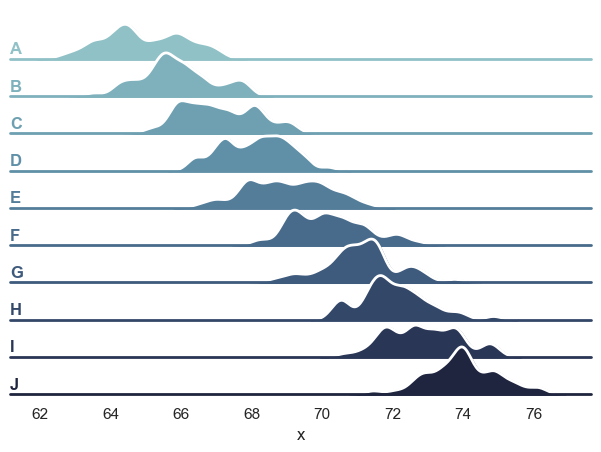

In [17]:
# style="white"：设置白色背景主题
# rc={"axes.facecolor": (0, 0, 0, 0)}：将坐标轴背景设为完全透明（RGBA中的(0,0,0,0)）
# 这样设置是为了后续创建重叠效果做准备
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)                         # 生成500个标准正态分布随机数
g = np.tile(list("ABCDEFGHIJ"), 50)       # 创建分组标签（A-J重复50次）
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m            # 将每个组的x值偏移其ASCII码值（A=65, B=66等）

display(df)

# Initialize the FacetGrid object
# 创建10色的cubehelix调色板（对应A-J 10个组）
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
# 绘制填充的KDE图，设置带宽调整系数0.5
g.map(sns.kdeplot, "x",
      bw_adjust=0.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# 在同一位置绘制白色边框的KDE图，创造描边效果
g.map(sns.kdeplot, "x",
      clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
# 在y=0处添加参考线
# color=None：使用hue映射的颜色（与每组颜色一致）
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# 自定义函数在每个子图左侧添加组标签（A-J）
# 使用坐标轴坐标系统（transform=ax.transAxes）定位
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "x")

# Set the subplots to overlap
# 设置负的子图间距（hspace=-.25），使子图重叠
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")                    # 移除所有标题
g.set(yticks=[], ylabel="")         # 移除y轴刻度和标签
g.despine(bottom=True, left=True)   # 移除底部和左侧的轴线

## 最终效果

这段代码创造了一个精美的垂直排列的重叠密度图：
1. 10个组（A-J）各自有不同颜色的密度分布
2. 密度图有白色描边，提高可读性
3. 子图间有负间距，形成重叠效果
4. 左侧显示组标签
5. 整体风格简洁现代

这种可视化非常适合比较多个组的分布情况，同时保持紧凑的布局。